In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/cereal.csv")

# 6. Pandas (continued!)

Last time we just started using pandas to look at and preprocess data -- but it also has many more capabilities, which we will see today!

## 6.4 Groups and Aggregates

When we have lots and lots of data, it's more useful to look at aggregate statistics like the mean or median. But sometimes we lose too much detail aggregating across the whole dataset.

The solution is to aggregate across groups. For example, maybe we're less interested in the mean calorie count of all cereals and more interested in the mean for each manufacturer.

In [3]:
# First, we can see how many (and which) unique manufacturers there are
# Note: this gives us a numpy array
df["mfr"].unique()

NameError: name 'df' is not defined

In [2]:
# Now let's group by the manufacturers
# This gives us a groupby object across the dataframe
mfrs = df.groupby("mfr")
mfrs

In [3]:
# what happens if we try to access the calories column?
mfrs["calories"]

In [4]:
# now let's try to get the mean
mfrs["calories"].mean()

mfr
A    100.000000
G    111.363636
K    108.695652
N     86.666667
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64

In [7]:
# we can also aggregate across multiple columns, and even use different aggregations
# let's get the average calorie count but the maximum protein
mfrs[["calories", "protein"]].agg({"calories": "mean", "protein": "max"})

,calories,protein
mfr,,
A,100.000000,4
G,111.363636,6
K,108.695652,6
N,86.666667,4
P,108.888889,3
Q,95.000000,5
R,115.000000,4


# 7. Plotting

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=500 />

Visualization is an important part of exploring your data. Often, we can see trends that might get lost in rows and rows of numbers.

We'll be visualizing the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=300 />

In [10]:
penguins = pd.read_csv("../data/penguins_lter.csv")

In [11]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## 7.1 matplotlib

`matplotlib` is _the_ plotting library in Python (but also its the black sheep). It's based on MATLAB... so if you're into that, good! If you're not, I'm so sorry.

In [8]:
import matplotlib.pyplot as plt

<img src="https://matplotlib.org/_images/anatomy.png" width=400/>


In [ ]:
penguins.head()

### 7.1.1 Single Variable

The simplest visualizations we can do are for single variables. How are they distributed across our dataset? For continuous variables, we can use a histogram.

<AxesSubplot:ylabel='Frequency'>

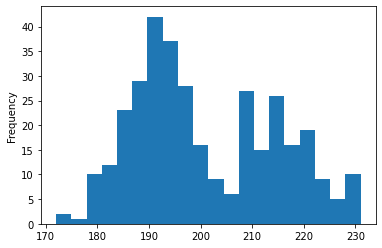

In [12]:
# what is the distribution of flipper lengths?
penguins["Flipper Length (mm)"].plot.hist(bins=20)

For discrete variables, we can use a bar chart.

In [ ]:
penguins["Island"].value_counts().plot.bar()

### 7.1.2 Two variables

Sometimes we're also interested in how two variables relate to each other. For two continuous variables, we can use a scatter plot.

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

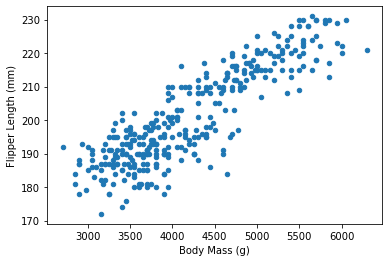

In [13]:
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)")

For a discrete and a continuous variable, you can use small multiples.

In [ ]:
penguins["Body Mass (g)"].hist(by=penguins["Species"], figsize=(10, 10))

An alternative to small multiples is colorcoding

Species
Adelie Penguin (Pygoscelis adeliae)          AxesSubplot(0.125,0.125;0.775x0.755)
Chinstrap penguin (Pygoscelis antarctica)    AxesSubplot(0.125,0.125;0.775x0.755)
Gentoo penguin (Pygoscelis papua)            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Body Mass (g), dtype: object

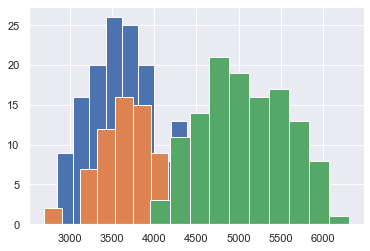

In [20]:
penguins.groupby("Species")["Body Mass (g)"].hist()

### 7.1.3 Three or more variables

How do we visualize more than two variables in two dimensions? There's a lot of options! For example, if we wanted to compare body mass and flipper length, but across species, we can use small multiples or color-coding also!

In [ ]:
penguins.Species.unique()

In [ ]:
colormap = {
    "Adelie Penguin (Pygoscelis adeliae)": "#ff8100",
    "Gentoo penguin (Pygoscelis papua)": "#087175",
    "Chinstrap penguin (Pygoscelis antarctica)": "#c15bcb"
}
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)", c=penguins.Species.apply(colormap.get), figsize=(10, 10))

## 8. Seaborn

As your visualizations become more complex and less exploratory, you might find `matplotlib` annoying or restricting. A good alternative is `seaborn` (the golden child), which is a plotting library that provides an abstraction over `matplotlib`.

In [14]:
import seaborn as sns
sns.set()  # sets settings

Let's do the color-coded scatter plot again!

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

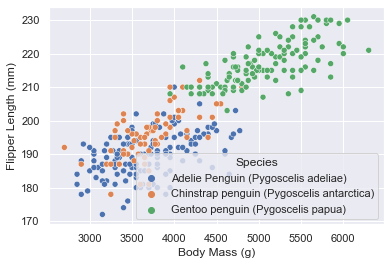

In [15]:
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species")

Seaborn also makes it easy for us to add even more dimensions to our visualization.

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species", size="Culmen Depth (mm)")

Using some of Seaborn's more advanced visualizations, we might even discover some actionable patterns (you can see just some of the things `seaborn` can do [here](https://seaborn.pydata.org/examples/index.html)).

Let's go back to our initial 1-dimensional continuous plots for a second.

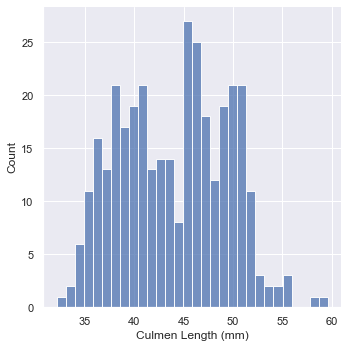

In [18]:
sns.displot(data=penguins, x="Culmen Length (mm)", bins=30)

This is cool and all, but what if we want a smoother representation of the distribution? Seaborn provides "kernel density estimates", which is a fancy way of saying a smoother version of the histogram.

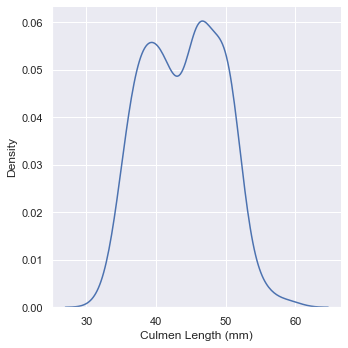

In [17]:
sns.displot(data=penguins, x="Culmen Length (mm)", kind="kde")

We can even plot the KDEs of two different continuous variables against each other!

In [ ]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", kind="kde")

Now, let's split by species to see if we can spot any differences.

In [ ]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", kind="kde")